# Regresión Bosques Aleatorios

Se usan varios árboles aleatorios que toman distintos datos, luego, para las predicciones se toma el promedio de cada uno de los valores arrojados por cada árbol.

# Cómo importar las librerías


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importar el data set


In [3]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [4]:
dataset.head(10)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


Son los mismos datos usados para el árbol aleatorio.

In [5]:
print(X)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


# Dividir el data set en conjunto de entrenamiento y conjunto de testing


In [1]:
"""
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
"""

'\nfrom sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)\n'

# Escalado de variables

In [ ]:
"""
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
"""

# Ajustar el Random Forest con el dataset

In [6]:
from sklearn.ensemble import RandomForestRegressor

In [7]:
regression = RandomForestRegressor(n_estimators = 300, random_state = 0)
regression.fit(X, y)

RandomForestRegressor(n_estimators=300, random_state=0)

# Predicción de nuestros modelos con Random Forest


In [9]:
y_pred = regression.predict([[6.5]])
print(y_pred)

[160333.33333333]


Vemos que es mucho más prescisa que solo usando un árbol aleatorio, la cual fue de 150k. Vemos que se acerca al valor deseado de 160k.

# Visualización de los resultados del Random Forest

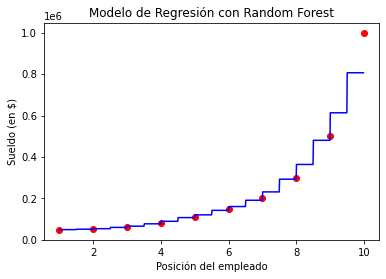

In [10]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, y, color = "red")
plt.plot(X_grid, regression.predict(X_grid), color = "blue")
plt.title("Modelo de Regresión con Random Forest")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo (en $)")
plt.show()

Al aumentar el número de árboles no necesariamente aumentan el número de hojas o escalones en la gráfica.

In [15]:
regression = RandomForestRegressor(n_estimators = 1300, random_state = 0)
regression.fit(X, y)

RandomForestRegressor(n_estimators=1300, random_state=0)

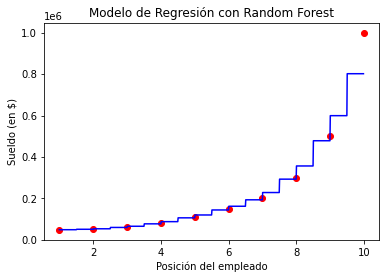

In [16]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, y, color = "red")
plt.plot(X_grid, regression.predict(X_grid), color = "blue")
plt.title("Modelo de Regresión con Random Forest")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo (en $)")
plt.show()

In [17]:
y_pred = regression.predict([[6.5]])
print(y_pred)

[161746.15384615]


Vemos que no hay cambios apreciables en la gráfica a pesar de usar más árboles. Esto es porque cada árbol busca minimizar la entropía de los datos con el ECM. Pero sí arroja una predicción menos prescisa.

Y es mejor 300, en este caso, que solo usando los diez árboles por defecto.

In [18]:
regression = RandomForestRegressor(random_state = 0)
regression.fit(X, y)

RandomForestRegressor(random_state=0)

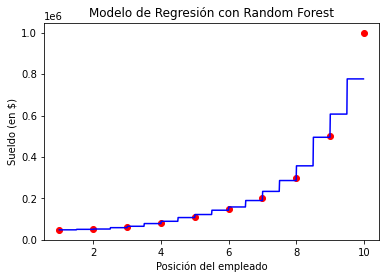

In [19]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, y, color = "red")
plt.plot(X_grid, regression.predict(X_grid), color = "blue")
plt.title("Modelo de Regresión con Random Forest")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo (en $)")
plt.show()

In [20]:
y_pred = regression.predict([[6.5]])
print(y_pred)

[158300.]


Da un valor menos presciso a los anteriores.